In [1]:
# 케라스를 이용해서 심장병 여부 판별하기

In [2]:
# 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [3]:
# 하이퍼패러미터 설정
MY_BATCH = 32
MY_EPOCH = 5

In [4]:
# 데이터 불러오기
raw_DB = pd.read_csv("heart.csv")

In [5]:
# 원본 데이터 확인
# display(raw_DB)
display(raw_DB.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# 원본 데이터 확인
raw_DB["age"].mean() # 나이 평균

raw_DB.groupby("sex")["age"].mean() # 성별에 따른 평균 나이

raw_DB.groupby("target")["target"].count() # 심장병 없는/있는 환자 수

raw_DB.groupby(["sex", "target"])["age"].mean() # 성별과 심장병 여부에 따른 평균 나이

sex  target
0    0         59.041667
     1         54.555556
1    0         56.087719
     1         50.903226
Name: age, dtype: float64

In [7]:
# 데이터 전처리 - 데이터 정규화(스케일링)
raw_temp = raw_DB[["age", "trestbps", "chol", "thalach", "oldpeak"]]

scaler = StandardScaler()
scaled_temp = scaler.fit_transform(raw_temp)
scaled_temp = pd.DataFrame(scaled_temp, columns=raw_temp.columns)

In [8]:
# 데이터 전처리 - 범주형 데이터에 대해 one-hot encoding 실시
from keras.utils import np_utils

temp1 = np_utils.to_categorical(raw_DB["sex"], 2)
temp2 = np_utils.to_categorical(raw_DB["cp"], 4)
temp3 = np_utils.to_categorical(raw_DB["restecg"], 3)
temp4 = np_utils.to_categorical(raw_DB["slope"], 3)
temp5 = np_utils.to_categorical(raw_DB["ca"], 5)
temp6 = np_utils.to_categorical(raw_DB["thal"], 4)

Using TensorFlow backend.


In [9]:
# 전처리된 데이터 병합
scaled_temp["sex_0"] = temp1[:, 0] # 여성 여부 열 추가
scaled_temp["sex_1"] = temp1[:, 1] # 남성 여부 열 추가
scaled_temp["cp_0"] = temp2[:, 0] # 가슴 통증 0번 유형 열 추가
scaled_temp["cp_1"] = temp2[:, 1] # 가슴 통증 1번 유형 열 추가
scaled_temp["cp_2"] = temp2[:, 2] # 가슴 통증 2번 유형 열 추가
scaled_temp["cp_3"] = temp2[:, 3] # 가슴 통증 3번 유형 열 추가
scaled_temp["restecg_0"] = temp3[:, 0] # 심전도 그래프 0번 유형 열 추가
scaled_temp["restecg_1"] = temp3[:, 1] # 심전도 그래프 1번 유형 열 추가
scaled_temp["restecg_2"] = temp3[:, 2] # 심전도 그래프 2번 유형 열 추가
scaled_temp["slope_0"] = temp4[:, 0] # ST 그래프 기울기 0의 경우 열 추가
scaled_temp["slope_1"] = temp4[:, 1] # ST 그래프 기울기 1의 경우 열 추가
scaled_temp["slope_2"] = temp4[:, 2] # ST 그래프 기울기 2의 경우 열 추가
scaled_temp["ca_0"] = temp5[:, 0] # 형광 투시 주요 혈관 0개 열 추가
scaled_temp["ca_1"] = temp5[:, 1] # 형광 투시 주요 혈관 1개 열 추가
scaled_temp["ca_2"] = temp5[:, 2] # 형광 투시 주요 혈관 2개 열 추가
scaled_temp["ca_3"] = temp5[:, 3] # 형광 투시 주요 혈관 3개 열 추가
scaled_temp["ca_4"] = temp5[:, 4] # 형광 투시 주요 혈관 4개 열 추가
scaled_temp["thal_0"] = temp6[:, 0] # 결함 종류 0의 경우 열 추가
scaled_temp["thal_1"] = temp6[:, 1] # 결함 종류 1의 경우 열 추가
scaled_temp["thal_2"] = temp6[:, 2] # 결함 종류 2의 경우 열 추가
scaled_temp["thal_3"] = temp6[:, 3] # 결함 종류 3의 경우 열 추가
scaled_temp["fbs"] = raw_DB["fbs"] # 공복 혈당 정상 여부 열 추가
scaled_temp["exang"] = raw_DB["exang"] # 운동 시 협심 증상 정상 여부 열 추가
scaled_temp

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,fbs,exang
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1


In [10]:
# 입력/출력 데이터 분리
x = scaled_temp
y = raw_DB["target"]

In [11]:
# 학습용/평가용 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

In [12]:
# 인공 신경망 생성
model = Sequential()
model.add(Dense(1000, activation="relu", input_dim=28)) # 첫 번째 은닉층 추가
model.add(Dense(1000, activation="relu")) # 두 번째 은닉층 추가
model.add(Dense(1, activation="sigmoid")) # 출력층 추가
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              29000     
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1001      
Total params: 1,031,001
Trainable params: 1,031,001
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 환경 설정
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])

In [14]:
# 학습 진행
history = model.fit(x_train, y_train, batch_size=MY_BATCH, epochs=MY_EPOCH,
                   validation_data=(x_test, y_test), verbose=1)

Epoch 1/5
7/7 [==============================] - 0s 25ms/step - loss: 0.5117 - acc: 0.7075 - val_loss: 0.2662 - val_acc: 0.9231
Epoch 2/5
7/7 [==============================] - 0s 7ms/step - loss: 0.3696 - acc: 0.8302 - val_loss: 0.2212 - val_acc: 0.9231
Epoch 3/5
7/7 [==============================] - 0s 8ms/step - loss: 0.3077 - acc: 0.8443 - val_loss: 0.2585 - val_acc: 0.8791
Epoch 4/5
7/7 [==============================] - 0s 7ms/step - loss: 0.2642 - acc: 0.8915 - val_loss: 0.2323 - val_acc: 0.9231
Epoch 5/5
7/7 [==============================] - 0s 7ms/step - loss: 0.2338 - acc: 0.9245 - val_loss: 0.2724 - val_acc: 0.9011


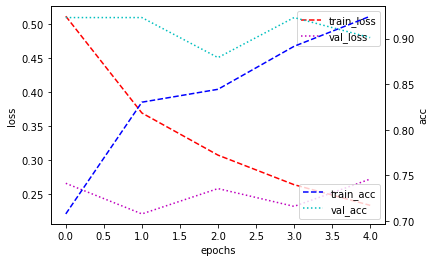

In [15]:
# 학습 내역 시각화
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history["loss"], "r--", label="train_loss")
loss_ax.plot(history.history["val_loss"], "m:", label="val_loss")

acc_ax.plot(history.history["acc"], "b--", label="train_acc")
acc_ax.plot(history.history["val_acc"], "c:", label="val_acc")

loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")
acc_ax.set_ylabel("acc")

loss_ax.legend()
acc_ax.legend()

plt.show()

In [16]:
# 평가 진행
score = model.evaluate(x_test, y_test, verbose=1)
print("loss:", score[0], ", acc:", score[1])

3/3 [==============================] - 0s 1ms/step - loss: 0.2724 - acc: 0.9011
loss: 0.27244070172309875 , acc: 0.901098906993866


In [17]:
# 예측 진행
y_pred = model.predict(x_test)

In [18]:
# 예측 데이터 후처리
y_pred = y_pred >= 0.5

In [19]:
# 혼동 행렬 생성
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, index=["actual_1", "actual_0"], columns=["pred_1", "pred_0"])
display(cm)

,pred_1,pred_0
actual_1,41,2
actual_0,7,41


In [20]:
# 정밀도, 재현율, f1 점수 확인
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(precision, recall, f1)

0.9534883720930233 0.8541666666666666 0.9010989010989011
